In [2]:
%load_ext autoreload
%autoreload 2

In [23]:
import sys
sys.path.append('../classes')
import numpy as np
from Material import Material
# from abdCalcs import ABD
from SandwichPanel import TestSpecimen

In [62]:
Eglass6oz = Material("6oz_Eglass", 29.7E9, 29.7E9,5.3E9, 0.17, 539.99 * 3/2)
Eglass4oz = Material("4oz_Eglass", 29.7E9 * 2/3, 29.7E9 * 2/3,5.3E9*2/3, 0.17, 539.99)
EPS_Foam = Material("EPS_Foam", 3.80E7,3.80E7, 1.9E7, 0.32, 0.0545E3)
PU_Foam = Material("PU_Foam", .220E9,.220E9, 0, 0, .240 * 1000)
Balsa = Material("Balsa", 2.20E9,2.20E9, .106E9, .25, 250) #Might need to adjust these
Basswood = Material("Basswood", 7.1E9, 0, 0, 320)
Carbon = Material("Carbon", 150E9, 0, 0, 1600)
w_balsa = 0.125
t = .25E-3*1/(0.0254)
h_eps = 2.5
w_eps = 10

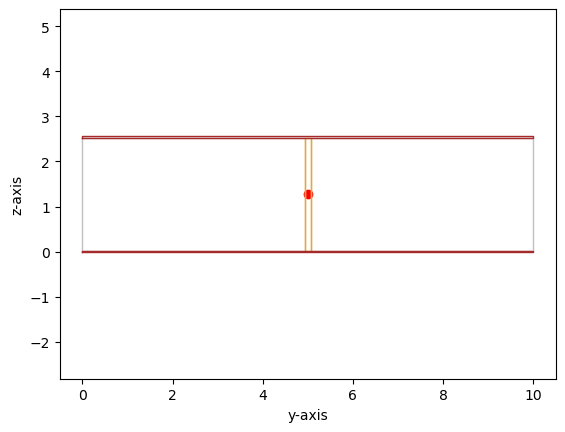

In [66]:
construction = {'Stringer':[Balsa,w_balsa],'Top Lam':[[Eglass4oz,t],[Eglass6oz,t]],\
            'Core':[EPS_Foam,h_eps,w_eps],'Bot Lam':[[Eglass4oz,t]]}

TDid_101 = TestSpecimen(construction)

#### TODO

1. Next make sure that the calculation for EIyy etc. are all correct
2. Calculate max fail load and stress etc
3. Incorporate the moemnt and shear diagrams into the plot
3. Create parent class Test Specimen which gets the data, calls moment of inertia, and finds effective moduli of laminates
    - Then create sub classes based on the design (Vertical Stringer, Horizontal Stringer). These sub classes will have the ability to get the data and the EIyy etc, but they will have a different get_geometry method for their given shape. Use an abstract class. 
    - Fix the way that the geometry of the cross section is found. Use coordinates and not the stupid yzs thing.